Libraries

In [2]:
import math
from ROOT import *
import numpy as np
from array import array
import glob

# For inline image display
from IPython.display import Image

Welcome to JupyROOT 6.24/04


Settings

In [3]:
# Set ROOT graphics options

gROOT.SetStyle("Plain")

# Default canvas  size

gStyle.SetCanvasDefW(600)
gStyle.SetCanvasDefH(400)
 
# set the margins
  
gStyle.SetPadBottomMargin(0.18)
gStyle.SetPadTopMargin(0.08)
gStyle.SetPadRightMargin(0.08)
gStyle.SetPadLeftMargin(0.17)

# set the number of divisions to show

gStyle.SetNdivisions(510, "xy")

# show grid

gStyle.SetPadGridX(1)
gStyle.SetPadGridY(1)

# border ploted only around statistics

gStyle.SetPadBorderMode(0)
gStyle.SetFrameBorderMode(0)
gStyle.SetLegendBorderSize(0)
gStyle.SetTitleBorderSize(0)
gStyle.SetStatBorderSize(1)

# Text sizes

gStyle.SetTextSize(0.05)
gStyle.SetTitleSize(0.06,"xyz")
gStyle.SetLabelSize(0.05,"xyz")

gStyle.SetLabelOffset(0.015,"xyz")
gStyle.SetTitleOffset(1.2,"yz")
gStyle.SetTitleOffset(1.0,"x")

# Font settings

font = 42
gStyle.SetTitleFont(font)
gStyle.SetTitleFontSize(0.05)
gStyle.SetStatFont(font)
gStyle.SetStatFontSize(0.06)
gStyle.SetTextFont(font)
gStyle.SetLabelFont(font,"xyz")
gStyle.SetTitleFont(font,"xyz")
gStyle.SetLegendFont(font)

# Line settings

gStyle.SetHistLineWidth(2)
gStyle.SetFrameLineWidth(2)
gStyle.SetFuncWidth(2)
gStyle.SetHistLineColor(kBlue)
gStyle.SetFuncColor(kRed)

# Log scale
gStyle.SetOptLogy(0)

# Histogram title
gStyle.SetOptTitle(1)  

# Histogram statistics
gStyle.SetOptStat(1100)

# Fit results
gStyle.SetOptFit(0) 


Access data in files

In [4]:
# Input files to consider

# allfiles= glob.glob('uhcr_*.dat')

allfiles = ['uhcr_1.dat','uhcr_2.dat','uhcr_3.dat','uhcr_4.dat','uhcr_5.dat','uhcr_6.dat']

print(len(allfiles),' input data files available')

# select one of the files for analysis 

myfile = allfiles[2]

print ('Reading input file ',myfile)
data= np.loadtxt(myfile,skiprows=1)

x_pos, y_pos, t_peak, a_peak = array( 'd' ), array( 'd' ), array( 'd' ), array( 'd' )
z_pos = array('d')

npos = data[:,0].size

# Access data columns

for i in range(npos):
    x_pos.append(data[i,0])    # antenna position x (m)
    y_pos.append(data[i,1])    # antenna position y (m)
    z_pos.append(0)
    t_peak.append(1000000.*data[i,2])   # pulse peak time (s) - convert to micro seconds
    a_peak.append(data[i,3])   # pulse peak amplitude (micro-volt)
    
print (npos,' measurement points read')

# ROOT does not see numpy array, so we have to copy the data in the numpy array to the array from array package
# array package is seen by ROOT

6  input data files available
Reading input file  uhcr_3.dat
176  measurement points read


Plot our data

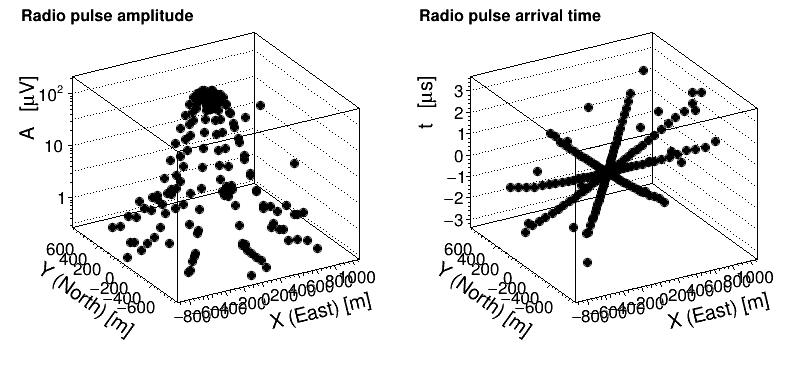

Info in <TCanvas::Print>: png file shprofile.png has been created


In [5]:
# Create 2D graph of measured pulse amplitudes

agr = TGraph2D("agr","Radio pulse amplitude",npos,x_pos,y_pos,a_peak)   # the last three parameters are not numpy arrays
                                                                        # they are arrays from array package 

# Create 2D graph of measured pulse arrival times

tgr = TGraph2D("tgr","Radio pulse arrival time",npos,x_pos,y_pos,t_peak)    # the same situation as above

# Set graph options

agr.SetMarkerStyle(20)
agr.GetXaxis().SetTitle("X (East) [m]")
agr.GetYaxis().SetTitle("Y (North) [m]")
agr.GetZaxis().SetTitle("A   [#muV]")
agr.GetXaxis().SetTitleOffset(1.5)
agr.GetYaxis().SetTitleOffset(1.8)

tgr.SetMarkerStyle(20)
tgr.GetXaxis().SetTitle("X (East) [m]")
tgr.GetYaxis().SetTitle("Y (North) [m]")

tgr.GetZaxis().SetTitle("t   [#mus]")
tgr.GetXaxis().SetTitleOffset(1.5)
tgr.GetYaxis().SetTitleOffset(1.8)

# Plot shower profiles

csh = TCanvas("csh","UHCR profile",800,400)
csh.Divide(2,1)

csh.cd(1)
agr.Draw("P")

# Log scale for amplitude ?
csh.GetPad(1).SetLogz(1)

csh.cd(2)
tgr.Draw("P")

csh.Update()
csh.Print('shprofile.png')

Image(filename='shprofile.png')

# 1 image - shape of the shower profile
# 2 image - the direction perp to this plane gives the direction from the shower

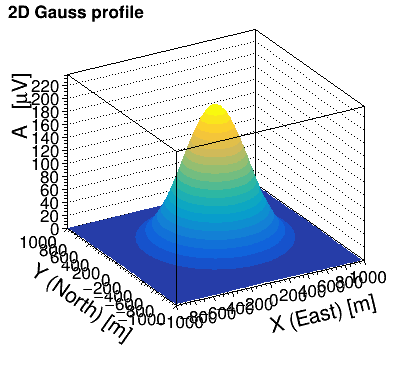

Info in <TCanvas::Print>: png file fprof.png has been created


In [6]:
# Define 2D shower profile (2D Gauss distribution)

def shprof(x,par):  # our fit function
    x0   = par[0]
    y0   = par[1]
    sig_x = par[2]
    sig_y = par[3]
    rho   = par[4]
    amp   = par[5]
    
    dx = x[0] - x0
    dy = x[1] - y0
    
    arg = dx*dx/sig_x/sig_x + dy*dy/sig_y/sig_y - 2*rho*dx*dy/sig_x/sig_y
    
    return amp*exp(-0.5*arg/(1-rho*rho))

fprof=TF2("fprof",shprof,-1000.,1000.,-1000.,1000.,6)

fprof.SetTitle("2D Gauss profile")

# Initialize function parameters

fprof.SetParameter(0,0.)    
fprof.SetParameter(1,0.) 
fprof.SetParameter(2,300.)    
fprof.SetParameter(3,300.) 
fprof.SetParameter(4,0.)    
fprof.SetParameter(5,np.max(a_peak)) 

fprof.SetNpx(100)
fprof.SetNpy(100)

fprof.GetXaxis().SetTitle("X (East) [m]")
fprof.GetYaxis().SetTitle("Y (North) [m]")
fprof.GetZaxis().SetTitle("A   [#muV]")
fprof.GetXaxis().SetTitleOffset(1.5)
fprof.GetYaxis().SetTitleOffset(1.8)

# Draw function (for test)

csh2 = TCanvas('csh2',"Shower profile",400,400)

fprof.Draw("surf2")

csh2.Update()
csh2.Print('fprof.png')

Image(filename='fprof.png')

Position of the shower axis:  4.5425688936537725  m (W->E),  25.859996982304445  m (S->N)


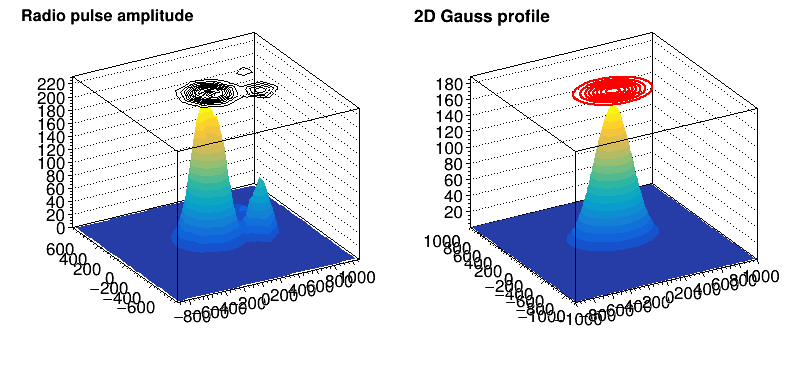


****************************************
Minimizer is Minuit / Migrad
Chi2                      =       102745
NDf                       =          170
Edm                       =  4.51992e-08
NCalls                    =          330
p0                        =      4.54257   +/-   9.62634     
p1                        =        25.86   +/-   6.94945     
p2                        =      192.351   +/-   10.0852     
p3                        =      142.297   +/-   7.27174     
p4                        =  -0.00853544   +/-   0.0793219   
p5                        =      171.913   +/-   4.13465     


Info in <TCanvas::Print>: png file fitprof.png has been created


In [7]:
# Fit profile to 2D graph

agr.Fit(fprof)

# Extract fit results

x0 = fprof.GetParameter(0)
y0 = fprof.GetParameter(1)

print("Position of the shower axis: ",x0," m (W->E), ",y0," m (S->N)")

# Draw data (interpolated) and fitted function 

csh3 = TCanvas('csh3',"Shower profile fit",800,400)

csh3.Divide(2,1)
csh3.cd(1)

agr.Draw("surf7")
# csh3.GetPad(1).SetLogz(1)

csh3.cd(2)
fprof.Draw("surf7")
fprof.SetMinimum(0.3)
# csh3.GetPad(2).SetLogz(1)

csh3.Update()
csh3.Print('fitprof.png')

Image(filename='fitprof.png')

Maybe we have to somehow derive z cooridnate. Having x,y,z Cartesian coordinates we can transform them into speherical coordinates. 

In [29]:
# transfer data from array type from array library to numpy array

x_pos_numpy = np.array([])
y_pos_numpy = np.array([])
z_pos_numpy = np.array([])

for i in range(npos):
    x_pos_numpy = np.append(x_pos_numpy, x_pos[i])
    y_pos_numpy = np.append(y_pos_numpy, y_pos[i])
    z_pos_numpy = np.append(z_pos_numpy, z_pos[i])

r = np.sqrt(x_pos_numpy ** 2 + y_pos_numpy ** 2 + z_pos_numpy ** 2)
phi = np.arctan2(y_pos_numpy, x_pos_numpy)
theta = np.arccos(z_pos_numpy, r)

phi_deg = phi * 180 / np.pi
theta_deg = theta * 180 / np.pi

phi_ar = array('d')
theta_ar = array('d')

for i in range(npos):
    phi_ar.append(phi_deg[i]) 
    theta_ar.append(theta_deg[i]) 

In [40]:
theta_deg

array([90., 90., 90., 90., 90., 90., 90., 90., 90., 90., 90., 90., 90.,
       90., 90., 90., 90., 90., 90., 90., 90., 90., 90., 90., 90., 90.,
       90., 90., 90., 90., 90., 90., 90., 90., 90., 90., 90., 90., 90.,
       90., 90., 90., 90., 90., 90., 90., 90., 90., 90., 90., 90., 90.,
       90., 90., 90., 90., 90., 90., 90., 90., 90., 90., 90., 90., 90.,
       90., 90., 90., 90., 90., 90., 90., 90., 90., 90., 90., 90., 90.,
       90., 90., 90., 90., 90., 90., 90., 90., 90., 90., 90., 90., 90.,
       90., 90., 90., 90., 90., 90., 90., 90., 90., 90., 90., 90., 90.,
       90., 90., 90., 90., 90., 90., 90., 90., 90., 90., 90., 90., 90.,
       90., 90., 90., 90., 90., 90., 90., 90., 90., 90., 90., 90., 90.,
       90., 90., 90., 90., 90., 90., 90., 90., 90., 90., 90., 90., 90.,
       90., 90., 90., 90., 90., 90., 90., 90., 90., 90., 90., 90., 90.,
       90., 90., 90., 90., 90., 90., 90., 90., 90., 90., 90., 90., 90.,
       90., 90., 90., 90., 90., 90., 90.])

Plot $\phi$ and $\theta$ 

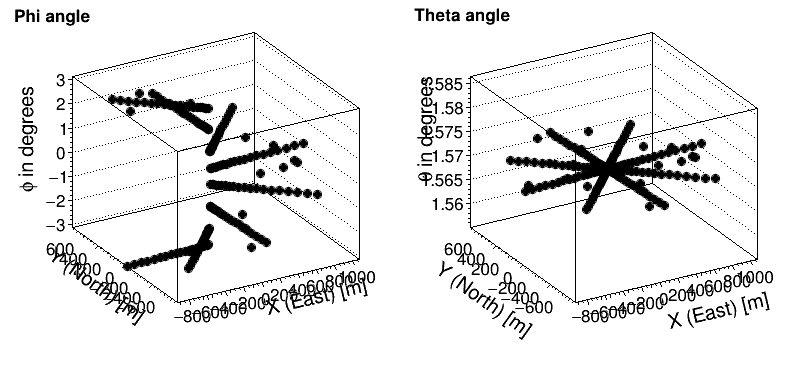

Warning in <TROOT::Append>: Replacing existing TGraph2D: agr (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TGraph2D: tgr (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: csh
Info in <TCanvas::Print>: png file shprofile.png has been created


In [39]:
# Create 2D graph of measured pulse amplitudes

agr = TGraph2D("agr","Phi angle",npos,x_pos,y_pos, phi_ar)   # the last three parameters are not numpy arrays
                                                                        # they are arrays from array package 

# Create 2D graph of measured pulse arrival times

tgr = TGraph2D("tgr","Theta angle",npos,x_pos,y_pos, theta_ar)    # the same situation as above

# Set graph options

agr.SetMarkerStyle(20)
agr.GetXaxis().SetTitle("X (East) [m]")
agr.GetYaxis().SetTitle("Y (North) [m]")
agr.GetZaxis().SetTitle("#phi in degrees  ")
# agr.GetXaxis().SetTitleOffset(1.5)
# agr.GetYaxis().SetTitleOffset(1.8)

tgr.SetMarkerStyle(20)
tgr.GetXaxis().SetTitle("X (East) [m]")
tgr.GetYaxis().SetTitle("Y (North) [m]")

tgr.GetZaxis().SetTitle("#theta in degrees")
tgr.GetXaxis().SetTitleOffset(1.5)
tgr.GetYaxis().SetTitleOffset(1.8)

# Plot shower profiles

csh = TCanvas("csh","UHCR profile",800,400)
csh.Divide(2,1)

csh.cd(1)
agr.Draw("P")

# Log scale for amplitude ?
# csh.GetPad(1).SetLogz(1)

csh.cd(2)
tgr.Draw("P")

csh.Update()
csh.Print('shprofile.png')

Image(filename='shprofile.png')

# 1 image - shape of the shower profile
# 2 image - the direction perp to this plane gives the direction from the shower